In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Add the root directory of the package to sys.path
sys.path.append('/Users/zzhang/Workspace/SpyDust/')
sys.path.append('../')

from grain_size import *


l_a computed
readPAH computed
Loaded previously computed Jpeisrf arrays from file.
Tev table already exists at /Users/zzhang/Workspace/SpyDust/SpyDust/Data_Files/Tev_30a_30chi.txt.
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
Gaunt factor stored


/Users/zzhang/Workspace/SpyDust/SpyDust/free_free.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(gff_data_file, delim_whitespace=True, comment=';', header=None, names=['gamma2', 'u', 'gff'])


In [5]:
a_tab, beta_tab = np.arange(3), np.arange(2)
a_beta_tab = np.array(np.meshgrid(a_tab, beta_tab)).T.reshape(-1, 2)

a_beta_tab

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [2, 0],
       [2, 1]])

In [ ]:
# grain_obj = Grain.grain_distribution()
# f_a_beta = grain_obj.shape_and_size_dist(6, a_weighted=False, normalize=True)
# a_tab = grain_obj.a_tab
# a_dist = grain_obj.a_dist


# # Fit the parametric model (grain_size_dist) of the grain size distribution to a_dist (the spdust built-in distbributions):
# from scipy.optimize import curve_fit
# from scipy.optimize import Bounds

# bounds = Bounds([-4.0, -30, 0], [4.0, 30, 100])

# def aux_grain_size_dist(log_a_tab, C, log_a0, sigma_inv):
#     return np.log(grain_size_dist(np.exp(log_a_tab), C, log_a0, sigma_inv))

# popt, pcov = curve_fit(aux_grain_size_dist, np.log(a_tab), np.log(a_dist), bounds=bounds)


# plt.plot(np.log(a_tab), np.log(a_dist), label="spdust")
# plt.plot(np.log(a_tab), aux_grain_size_dist(np.log(a_tab), *popt), label="fit")
# plt.legend()
# plt.xlabel("log(a)")
# plt.ylabel("log(dn/da)")


In [2]:
parameter_list, freqs, CNM_SED_list = SED_list_given_env(CNM_params)
# Save the parameter list and SED list
np.save('CNM_parameter_list.npy', parameter_list)
np.save('CNM_SED_list.npy', CNM_SED_list)
np.save('freqs.npy', freqs)

CNM_feature_list = fit_sed_ensemble(freqs, CNM_SED_list, parameter_list=parameter_list)
np.save('/Users/zzhang/Workspace/SpyDust/tests/grain_size_analysis/CNM_feature_list.npy', CNM_feature_list)


100%|██████████| 160000/160000 [00:32<00:00, 4853.76it/s]


(array([29514., 34648., 21405., 19377., 13250.,  9526.,  7789.,  6226.,
         4777.,  3206.,  2634.,  1713.,  1447.,   976.,  1134.,   519.,
          767.,   495.,   197.,   400.]),
 array([0.25348475, 0.30388707, 0.35428939, 0.40469171, 0.45509403,
        0.50549635, 0.55589867, 0.60630099, 0.65670331, 0.70710563,
        0.75750795, 0.80791027, 0.85831259, 0.90871491, 0.95911723,
        1.00951955, 1.05992188, 1.1103242 , 1.16072652, 1.21112884,
        1.26153116]),
 <BarContainer object of 20 artists>)

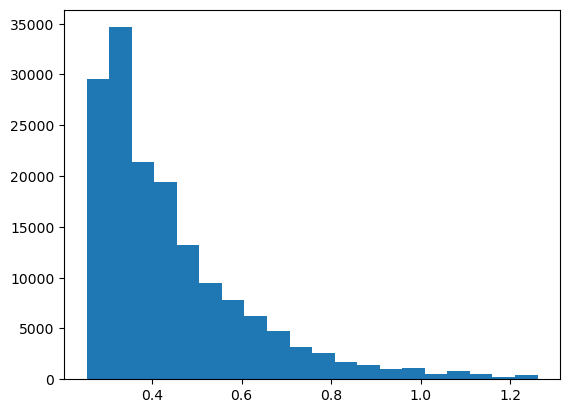

In [5]:
plt.hist(CNM_feature_list[:, 1], bins=20)

In [ ]:
# Create emulator with both forward and inverse capabilities
CNM_feature_emulator = PolyEmu(parameter_list, 
                               CNM_feature_list, 
                                forward=True,              # Enable forward emulation: parameters → observables
                                max_degree_forward=25,     # Max polynomial degree for forward mapping (lower for high-dimensional problems)
                                RMSE_lower=0.01,
                                fRMSE_tol=1e-1,
                                )

In [ ]:
CNM_logSED_emulator = PolyEmu(parameter_list, 
                            np.log(CNM_SED_list), 
                            forward=True,              # Enable forward emulation: parameters → observables
                            max_degree_forward=20,     # Max polynomial degree for forward mapping (lower for high-dimensional problems)
                            RMSE_lower=0.01,
                            fRMSE_tol=3e-1,
                            )

In [ ]:
# Save the emulators with pickle

import pickle

with open("CNM_feature_emulator.pkl", "wb") as f:
    pickle.dump(CNM_feature_emulator, f)

with open("CNM_logSED_emulator.pkl", "wb") as f:
    pickle.dump(CNM_logSED_emulator, f)

## Generate products for PDR

In [ ]:
parameter_list, freqs, PDR_SED_list = SED_list_given_env(PDR_params)
# Save the parameter list and SED list
np.save('PDR_SED_list.npy', PDR_SED_list)

PDR_feature_list = fit_sed_ensemble(freqs, PDR_SED_list, parameter_list=parameter_list)


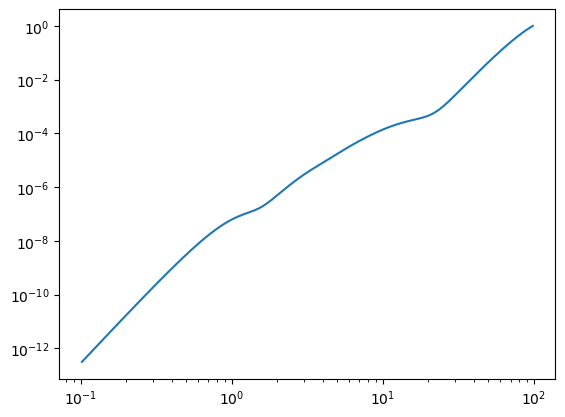

In [11]:
plt.loglog(freqs, PDR_SED_list[111800])

In [ ]:
np.save('PDR_feature_list.npy', PDR_feature_list)

In [ ]:

PDR_logSED_emulator = PolyEmu(parameter_list, 
                            np.log(PDR_SED_list), 
                            forward=True,              # Enable forward emulation: parameters → observables
                            max_degree_forward=20,     # Max polynomial degree for forward mapping (lower for high-dimensional problems)
                            RMSE_lower=0.01,
                            fRMSE_tol=3e-1,
                            )

In [ ]:
PDR_feature_emulator = PolyEmu(parameter_list, 
                                PDR_feature_list, 
                                forward=True,              # Enable forward emulation: parameters → observables
                                max_degree_forward=25,     # Max polynomial degree for forward mapping (lower for high-dimensional problems)
                                RMSE_lower=0.01,
                                fRMSE_tol=1e-1,
                                )

In [ ]:
with open("PDR_feature_emulator.pkl", "wb") as f:
    pickle.dump(PDR_feature_emulator, f)
with open("PDR_logSED_emulator.pkl", "wb") as f:
    pickle.dump(PDR_logSED_emulator, f)

## Conclusions

We closely follow spdust/SpyDust for the dust grain model.
The grain size (volume equivalent radius) ranges from 3.64e-08 \times 3.39e-7 cm.
Grain geometry: grains smaller than 6e-08cm is assumed to be cylindrical disk-like grain with given thickness, d. Grains larger than 6e-8 cm are modeled as spherical grains.
For the disk-like grain, our analysis will also consider two different thicknesses, d=3.35e-08 cm, which is used in the build-in model of spdust (and SpyDust), and another is its double, d=6.7e-08 cm.

This analysis will focus on the SED characteristics (peak frequency and width) given by log-normal fitting.
We will look into two scenarios: one is the SED of specific grain size, another is the SED of an distribution of grain size.
Through these analysis, we hope to disentangle the roles of grain size, grain shape and grain size distribution, on the AME SED characteristics.



### SED characteristic analyses with specific grain size and shape.
- Smaller grains has higher peak frequency (as expected)
- Disk-like grains: The SED of a flatter (more disk-like) grain has a higher peak frequency and a greater width.
- The width of the log-normal SED fit can be affected by the grain size and shape, but it is more vulnerable to the the grain size distribution.


## Conclusions

We adopt the dust grain model from spdust/SpyDust, which considers grains with volume-equivalent radii ranging from 3.64e-8 to 3.39e-7 cm. The grain geometry follows a size-dependent prescription: grains smaller than 6e-8 cm are modeled as cylindrical disk-like particles with specified thickness d, while larger grains (> 6e-8 cm) are treated as spherical particles.

For disk-like grains, we examine two thickness configurations: d = 3.35e-8 cm (the default value in spdust/SpyDust) and d = 6.7e-8 cm (twice the default thickness). This comparison allows us to investigate the impact of grain flattening on emission properties.

Our analysis focuses on characterizing spectral energy distribution (SED) properties through log-normal fitting, specifically examining peak frequency and spectral width. We investigate two complementary scenarios: (1) SEDs from individual grain sizes and shapes, and (2) ensemble SEDs from grain size distributions. Through this approach, we aim to disentangle the relative contributions of grain size, grain shape, and size distribution to the observed AME SED characteristics.

### Key Findings

- **Size dependence**: Smaller grains exhibit higher peak frequencies, consistent with theoretical expectations
- **Shape effects**: Flatter (more disk-like) grains produce SEDs with both higher peak frequencies and greater spectral widths compared to their spherical counterparts
- **Distribution sensitivity**: While grain size and shape influence the log-normal SED width, this parameter shows greater sensitivity to the choice of grain size distribution than to individual grain properties

These results demonstrate the complex interplay between grain physical properties and the resulting AME emission characteristics, highlighting the importance of considering both individual grain physics and ensemble effects in AME modeling.

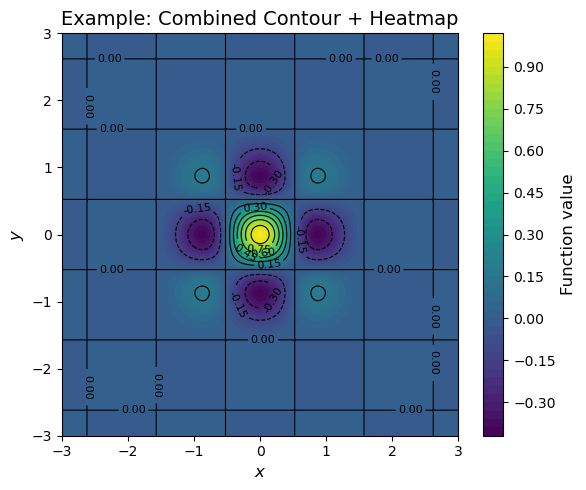

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Generate sample data
# -------------------------
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2)) * np.cos(3*X) * np.cos(3*Y)  # example function

# -------------------------
# Create the plot
# -------------------------
fig, ax = plt.subplots(figsize=(6, 5))

# Filled heatmap (smooth color shading)
cmap = plt.cm.viridis
heat = ax.contourf(X, Y, Z, levels=50, cmap=cmap)

# Contour lines (iso-values)
contours = ax.contour(X, Y, Z, levels=10, colors='black', linewidths=0.8)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.2f")

# Colorbar
cbar = fig.colorbar(heat, ax=ax)
cbar.set_label("Function value", fontsize=12)

# Axis labels and style
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
ax.set_title("Example: Combined Contour + Heatmap", fontsize=14)

# Clean layout
ax.tick_params(labelsize=10)
fig.tight_layout()

plt.show()